<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:300%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>DIABETES PREDICTION </b></u>
</div>


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>IMPORT NEEDED LIBRARIES </b>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

C:\Users\ZB G3 STUDIO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET LOADING ... </b>
</div>

In [2]:
df = pd.read_csv("diabetes.csv")

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAY A SAMPLE ... </b>
</div>

In [3]:
df.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
637,2,94,76,18,66,31.6,0.649,23,0
458,10,148,84,48,237,37.6,1.001,51,1
320,4,129,60,12,231,27.5,0.527,31,0
673,3,123,100,35,240,57.3,0.880,22,0


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET GENERAL INFORMATION </b>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
structure_summary = pd.DataFrame({'Data Type': df.dtypes, 
                                  'Non-Null Count': df.count(), 
                                  'Missing Values': df.isnull().sum()})

# Create a Styler object to apply formatting
styled_summary = structure_summary.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

In [6]:
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])

In [7]:
display(styled_summary)

,Data Type,Non-Null Count,Missing Values
Pregnancies,int64,768,0
Glucose,int64,768,0
BloodPressure,int64,768,0
SkinThickness,int64,768,0
Insulin,int64,768,0
BMI,float64,768,0
DiabetesPedigreeFunction,float64,768,0
Age,int64,768,0
Outcome,int64,768,0


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET SUMMARY </b>
</div>

In [8]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
Pregnancies,int64,0,0.000000,17,768
Glucose,int64,0,0.000000,136,768
BloodPressure,int64,0,0.000000,47,768
SkinThickness,int64,0,0.000000,51,768
Insulin,int64,0,0.000000,186,768
BMI,float64,0,0.000000,248,768
DiabetesPedigreeFunction,float64,0,0.000000,517,768
Age,int64,0,0.000000,52,768
Outcome,int64,0,0.000000,2,768


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>All Data is clean and numeric... To Next Step! </b>
</div>

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>FEATURES ENGINEERING </b>
</div>

In [9]:
# Feature Engineering: Replace zero values with mean
zero_not_allowed = ["Glucose", "BloodPressure", "SkinThickness"]
for column in zero_not_allowed:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [10]:
correlation_matrix = df.corr()

In [11]:
correlation_charges = correlation_matrix['Outcome']

# Displaying the correlation values in a styled format
styled_df = correlation_charges.to_frame().style.background_gradient(cmap='Blues')

styled_df

,Outcome
Pregnancies,0.221898
Glucose,0.492911
BloodPressure,0.165723
SkinThickness,0.214873
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


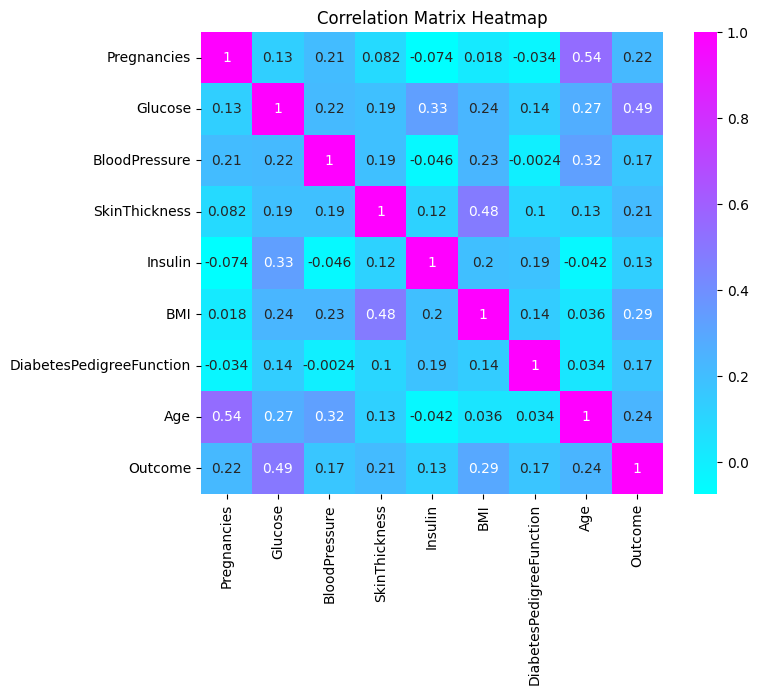

In [12]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DETERMINE Predictor & Target</b>
</div>

In [13]:
x = df[['Glucose' , "DiabetesPedigreeFunction" , 'Age' , "BMI" , "Insulin" , "Pregnancies"]]
x.sample(3)

,Glucose,DiabetesPedigreeFunction,Age,BMI,Insulin,Pregnancies
248,124.0,0.282,34,35.4,402,9
277,104.0,0.454,23,27.8,116,0
418,83.0,0.624,27,18.2,0,1


In [14]:
y = df['Outcome']
y.sample(3)

625    0
619    1
237    1
Name: Outcome, dtype: int64

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA SPLITING...</b>
</div>

In [15]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>BUILDING THE MODEL </b>
</div>

In [17]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1)

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL TRINING...</b>
</div>

In [18]:
# Train the model
svm_model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL TESTING</b>
</div>

In [19]:
# Make predictions on the testing data
y_pred = svm_model.predict(x_test)

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL EVALUATION</b>
</div>

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
data = {
    'Metric': ['Accuracy', 'Confusion Matrix', 'F1-Score'],
    'Value': [f"{accuracy:.2f}", str(conf_matrix), f"{f1:.2f}"]
}

# Create DataFrame
df_metrics = pd.DataFrame(data)

In [24]:
styled_summary = df_metrics.style.background_gradient(cmap='GnBu')

styled_summary

,Metric,Value
0,Accuracy,0.81
1,Confusion Matrix,[[95 12] [18 29]]
2,F1-Score,0.66


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>THE CONFUSION MATRIX</b>
</div>

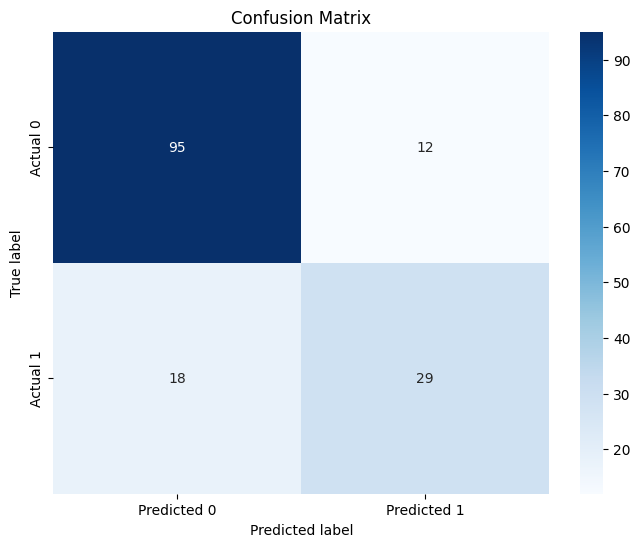

In [28]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>THE DECISION BOUNDARY</b>
</div>

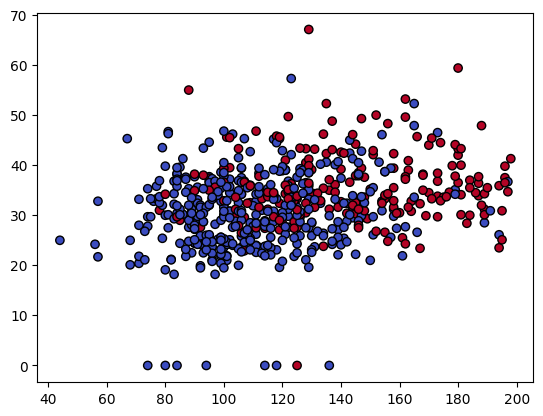

In [20]:
# Plot the decision boundary
plt.scatter(x_train['Glucose'], x_train['BMI'], c=y_train, cmap='coolwarm', marker='o', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

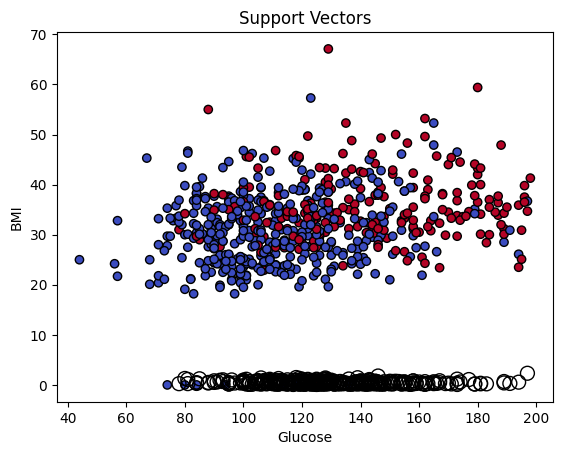

In [27]:
plt.scatter(x_train['Glucose'], x_train['BMI'], c=y_train, cmap='coolwarm', marker='o', edgecolors='k')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Support Vectors')
plt.show()

<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>FEATURES VISUALIZATION</b>
</div>

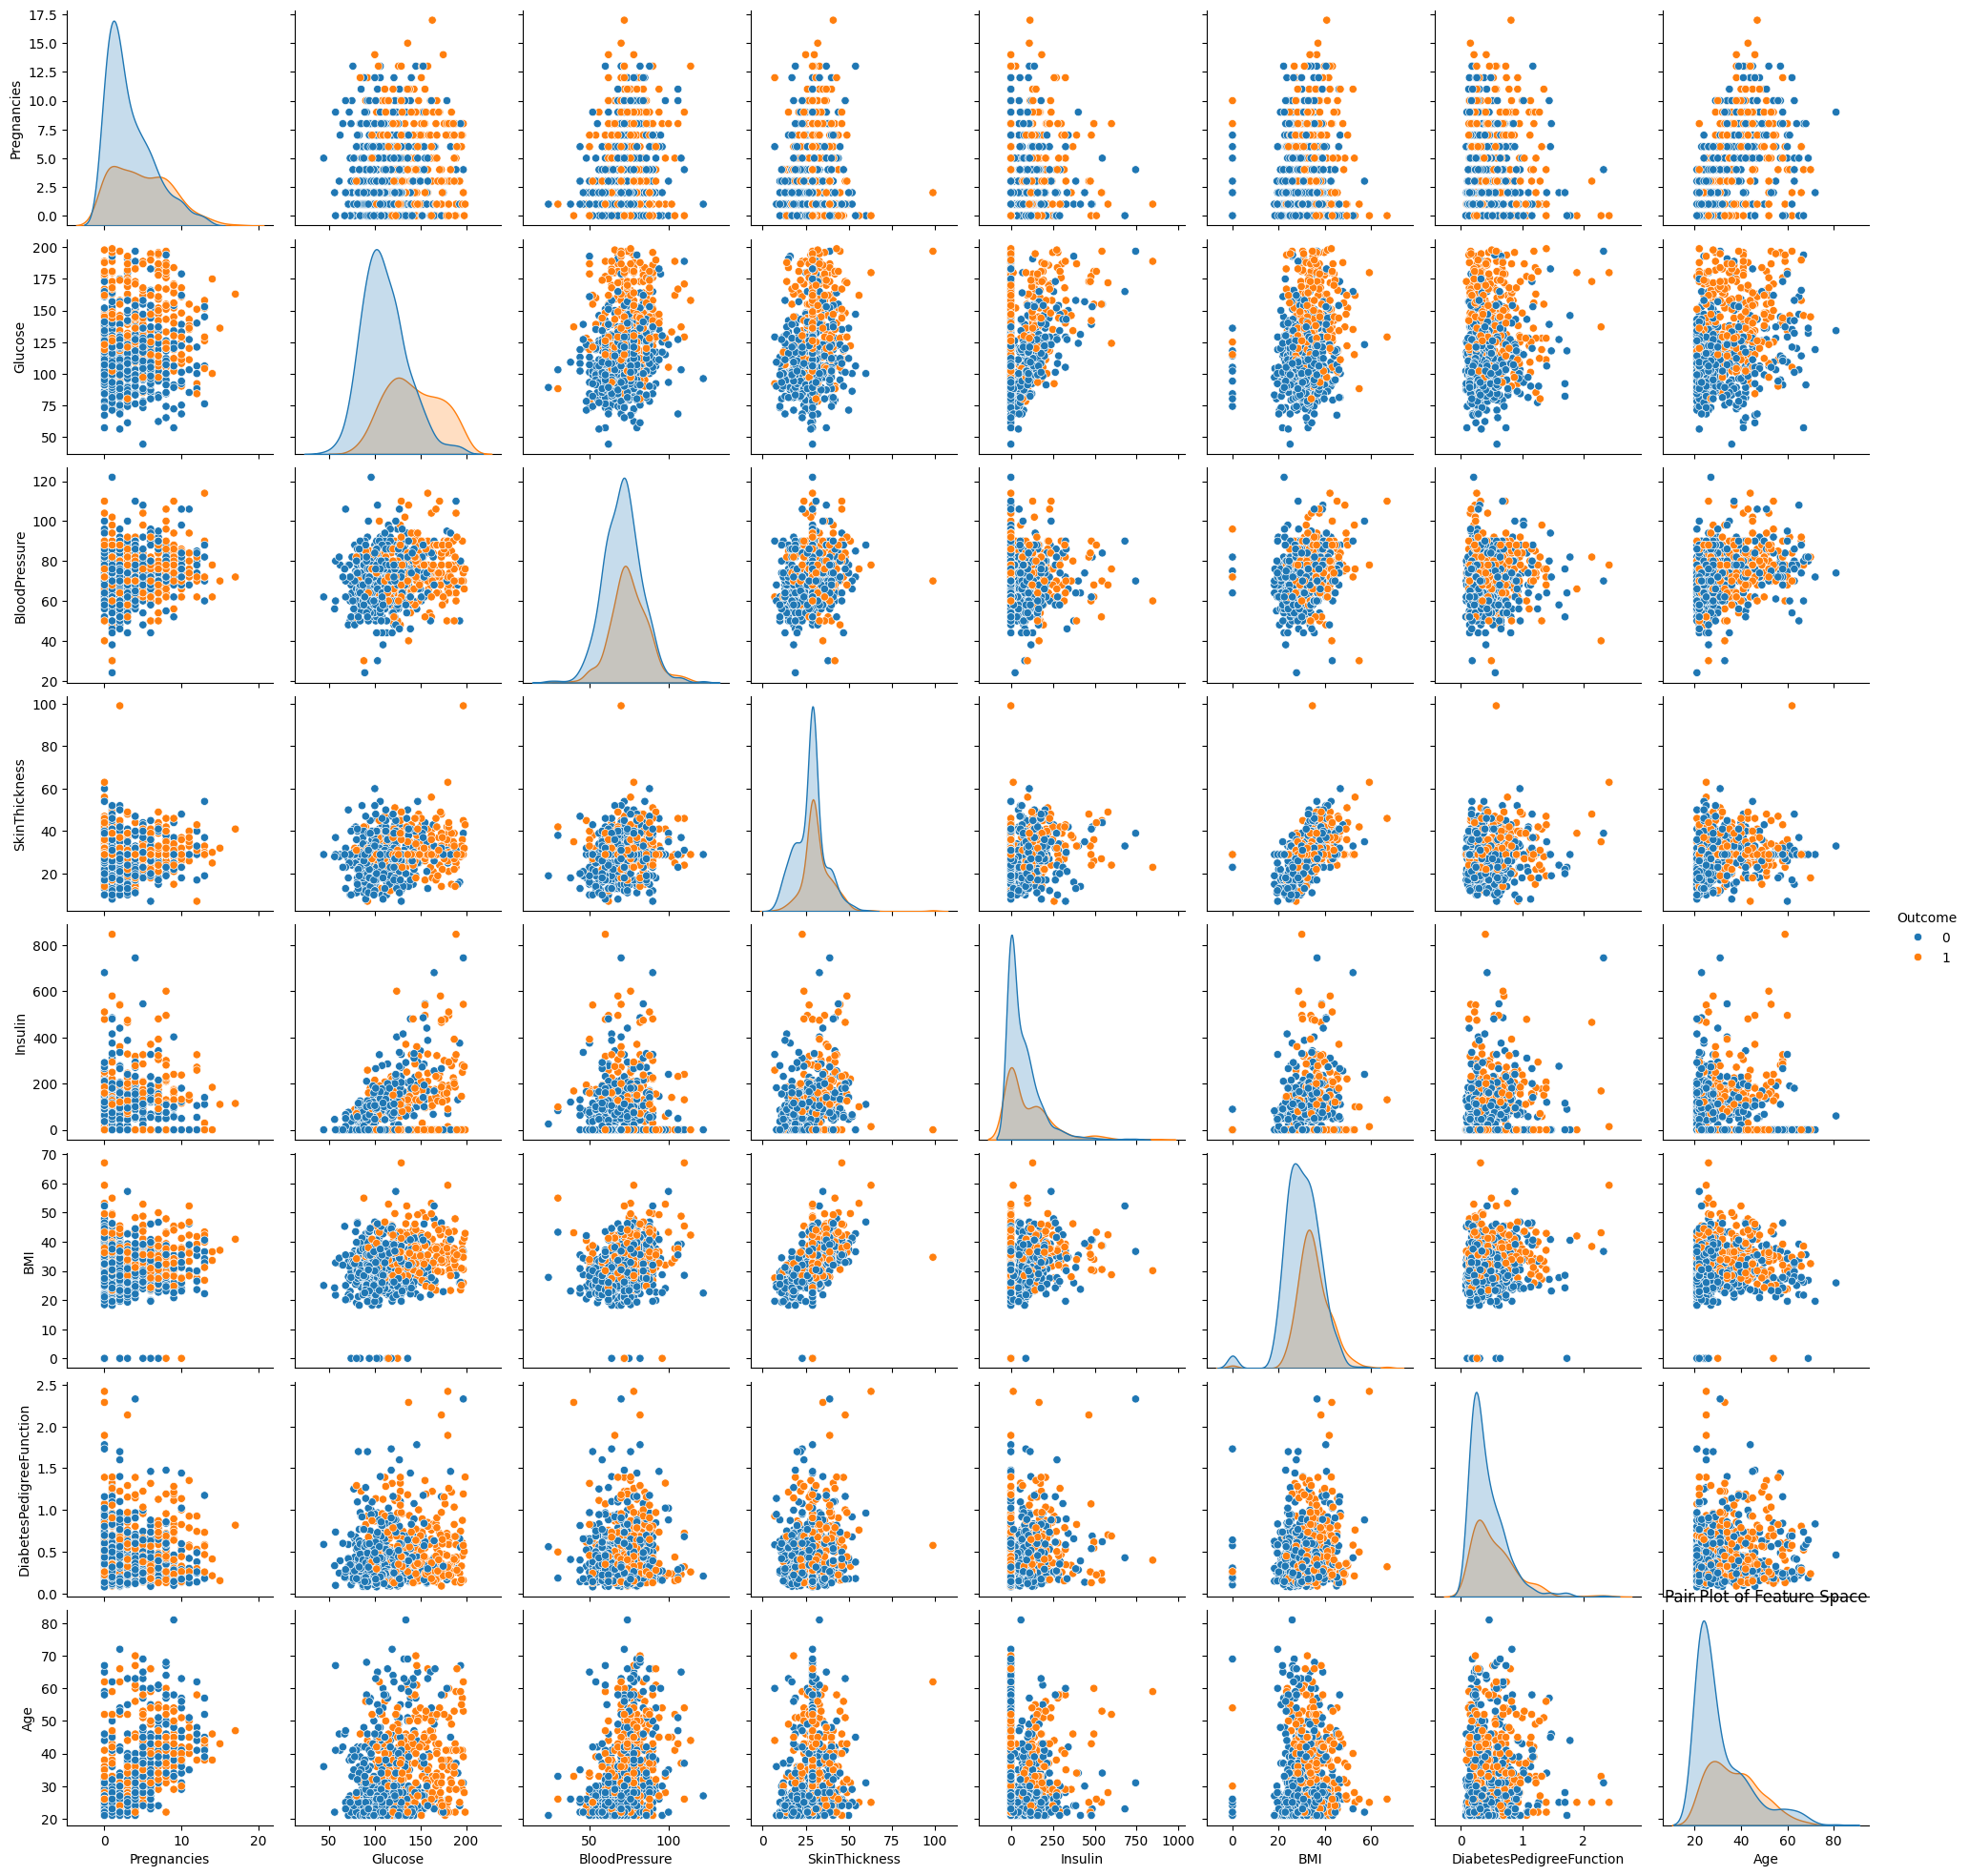

In [28]:
# Create a pair plot
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers='o')

# Customize the plot (optional)
plt.title("Pair Plot of Feature Space")
plt.show()

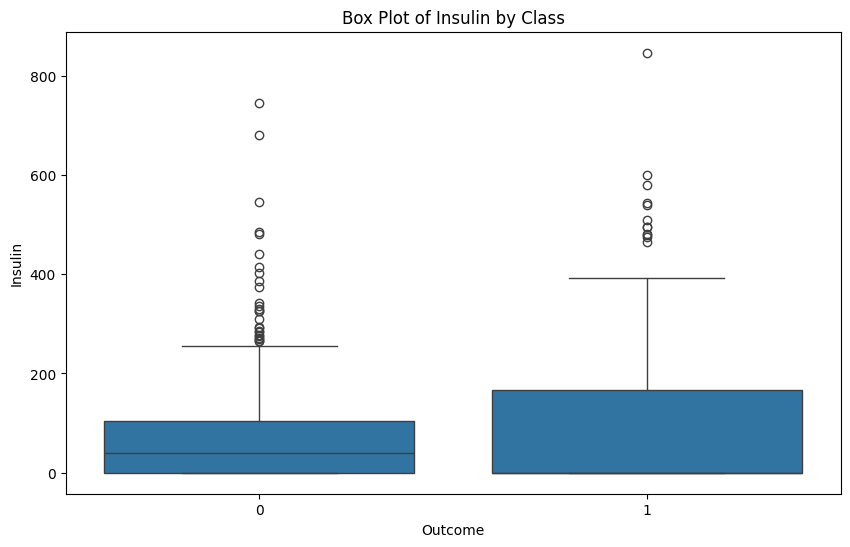

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title("Box Plot of Insulin by Class")
plt.show()


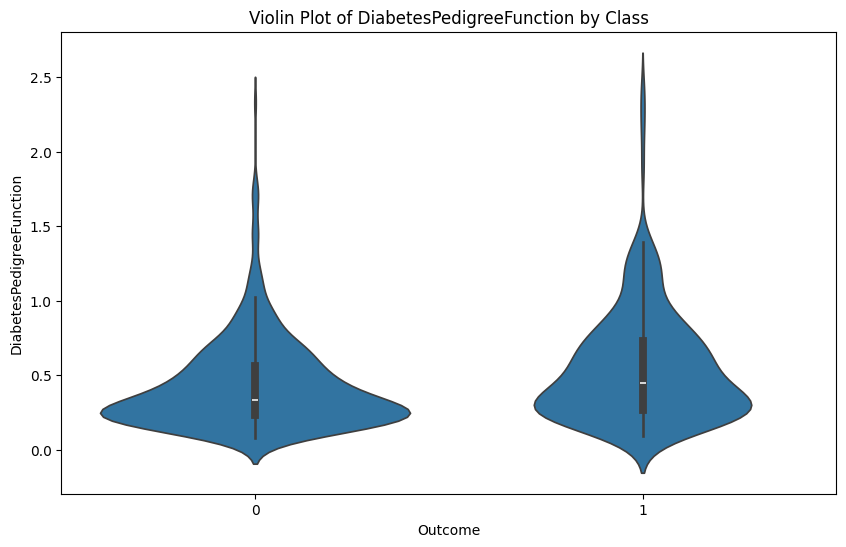

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title("Violin Plot of DiabetesPedigreeFunction by Class")
plt.show()


In [37]:
import plotly.graph_objects as go

# Assuming you have a pandas DataFrame 'df' with features
# Replace 'total_bill' with your actual feature name

fig = go.Figure(data=go.Violin(y=df['DiabetesPedigreeFunction'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6, x0='DiabetesPedigreeFunction'))
fig.update_layout(yaxis_zeroline=False)
fig.show()


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>3D Scatter Plot</b>
</div>

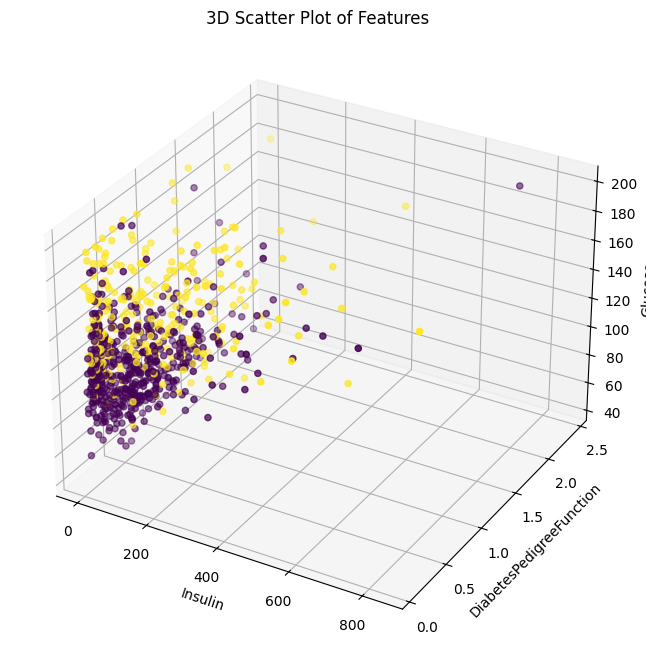

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Insulin'], df['DiabetesPedigreeFunction'], df['Glucose'], c=df['Outcome'], cmap='viridis')
ax.set_xlabel('Insulin')
ax.set_ylabel('DiabetesPedigreeFunction')
ax.set_zlabel('Glucose')
plt.title("3D Scatter Plot of Features")
plt.show()


<div style="padding:10px;
            color:#9fc5e8;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Manifold Learning (t-SNE)</b>
</div>

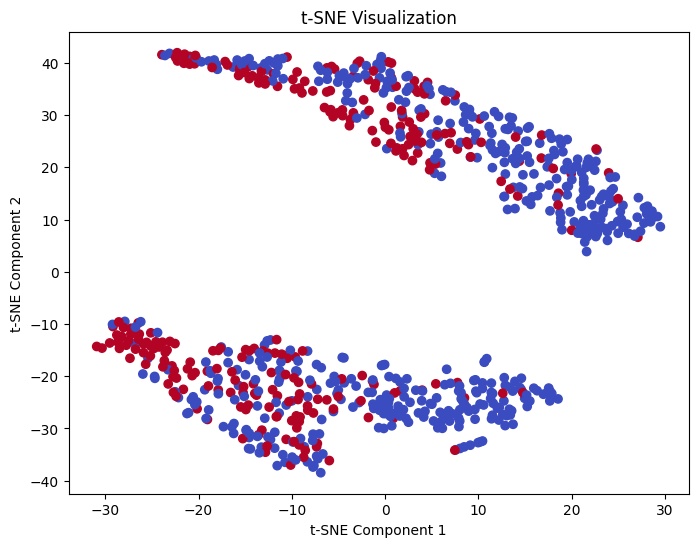

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
transformed_data = tsne.fit_transform(df.drop(columns=['Outcome']))

plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=df['Outcome'], cmap='coolwarm')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()